# KNN - PREDICT DIABETES

# 1️. LOAD DATA

In [58]:
import pandas as pd
import numpy as np

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2️. Initial data inspection

In [59]:
df.info()
df.describe()
df['Outcome'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Outcome
0    500
1    268
Name: count, dtype: int64

# 3️. Exploratory Data Analysis (EDA)

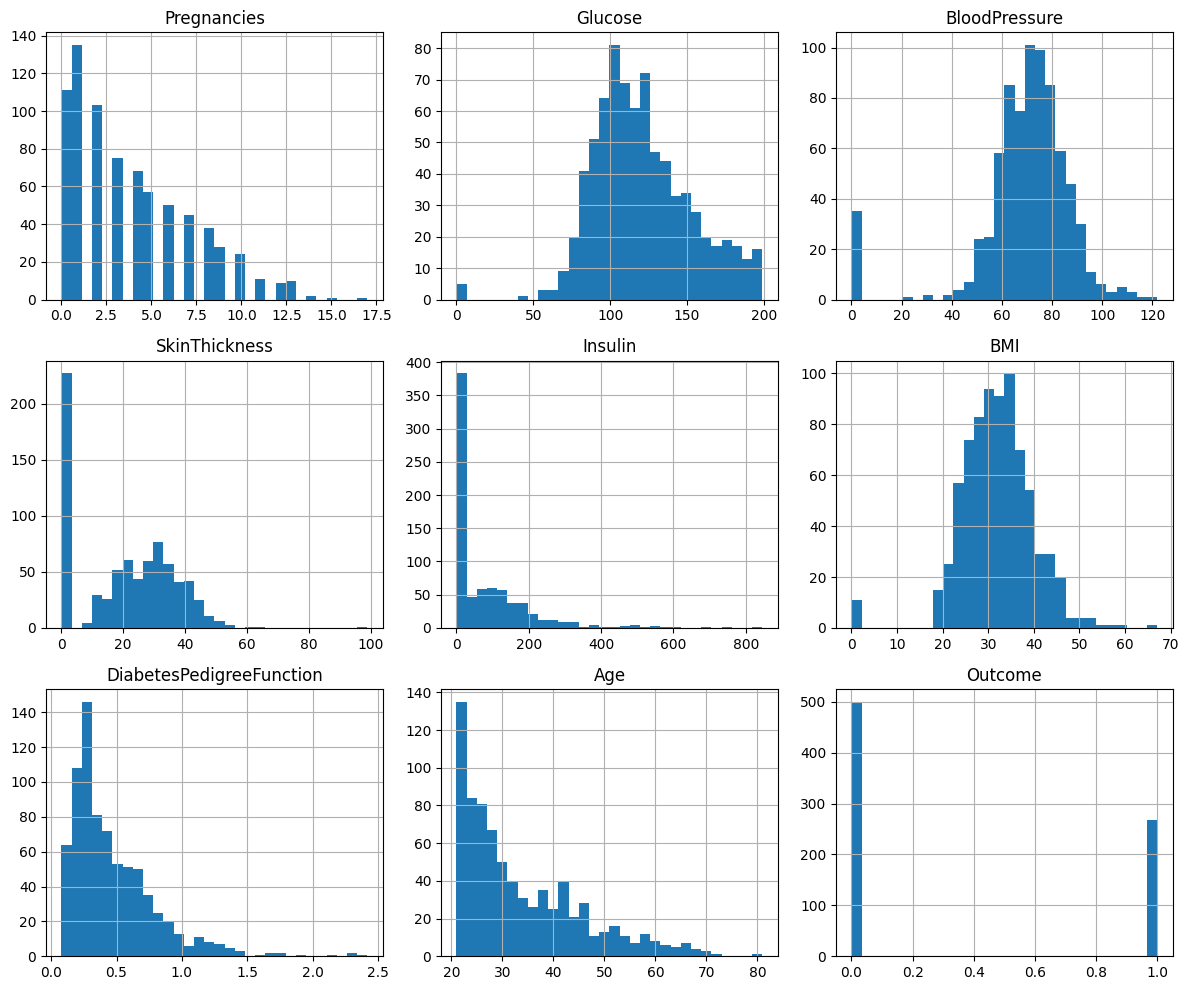

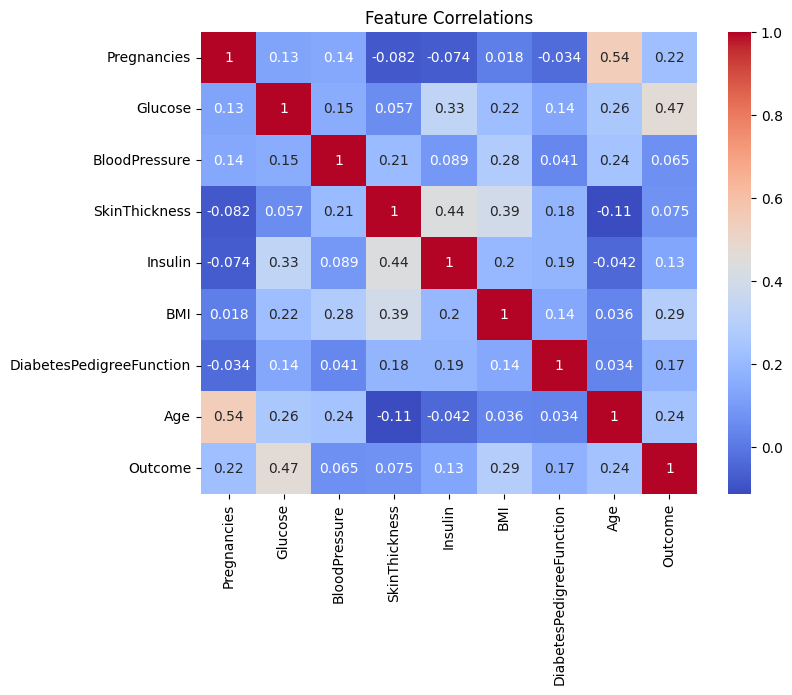

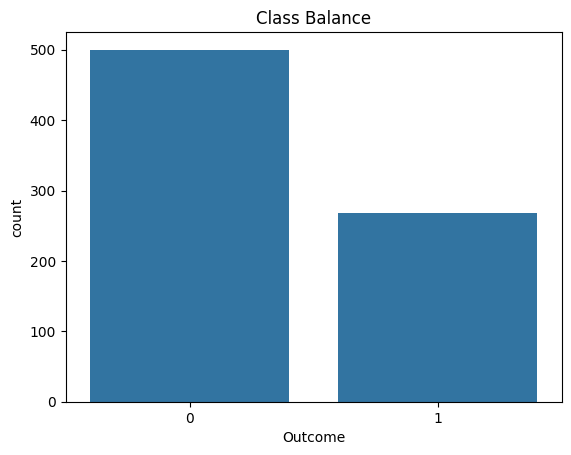

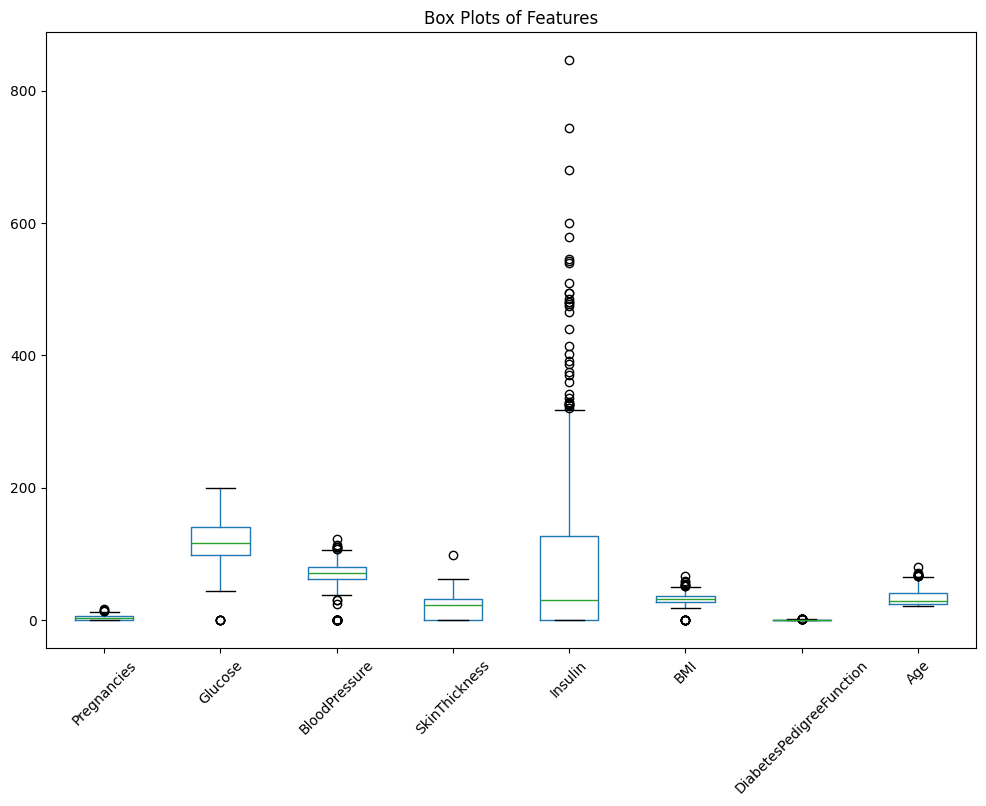

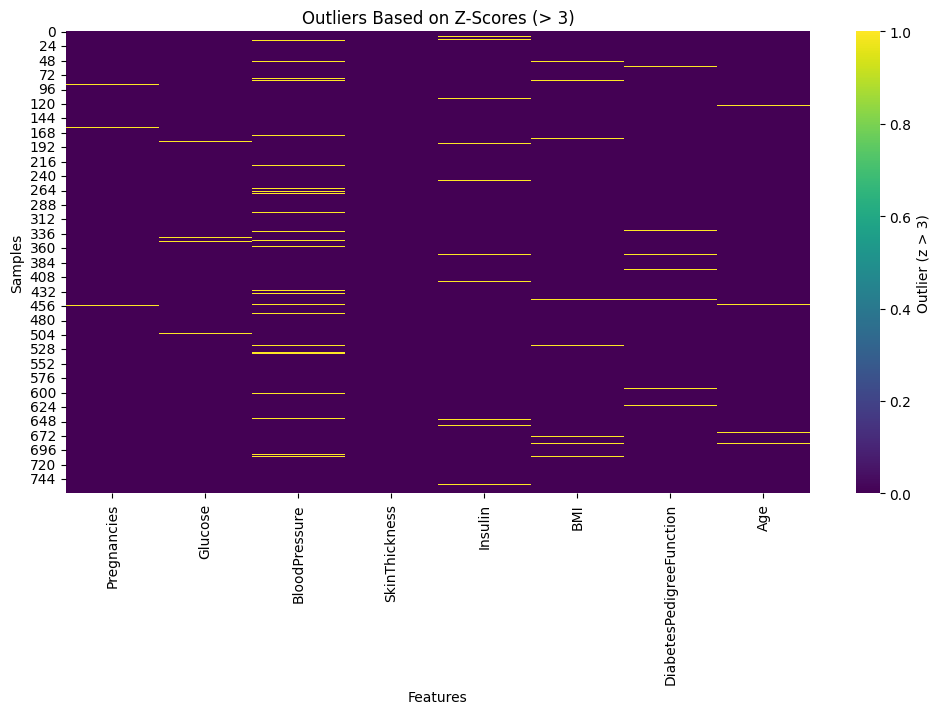

Number of outliers per feature (z-score > 3):
Pregnancies                  4
Glucose                      5
BloodPressure               35
SkinThickness                1
Insulin                     18
BMI                         14
DiabetesPedigreeFunction    11
Age                          5
dtype: int64


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Histograms
df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

# Class balance
sns.countplot(x='Outcome', data=df)
plt.title('Class Balance')
plt.show()

# Box plots for each feature
plt.figure(figsize=(12, 8))
df.boxplot(column=df.columns.drop('Outcome').tolist(), grid=False)  # Convert to list
plt.title('Box Plots of Features')
plt.xticks(rotation=45)
plt.show()

# Calculate and visualize z-scores for outlier detection
z_scores = np.abs(stats.zscore(df.drop('Outcome', axis=1)))
plt.figure(figsize=(12, 6))
sns.heatmap(z_scores > 3, cmap='viridis', cbar_kws={'label': 'Outlier (z > 3)'})
plt.title('Outliers Based on Z-Scores (> 3)')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

# Summary of outliers per feature
outlier_counts = (z_scores > 3).sum()
print("Number of outliers per feature (z-score > 3):")
print(outlier_counts)

# 4️. Preprocessing data

In [61]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero:
    median = df[col].median()
    df[col] = df[col].replace(0, median)

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


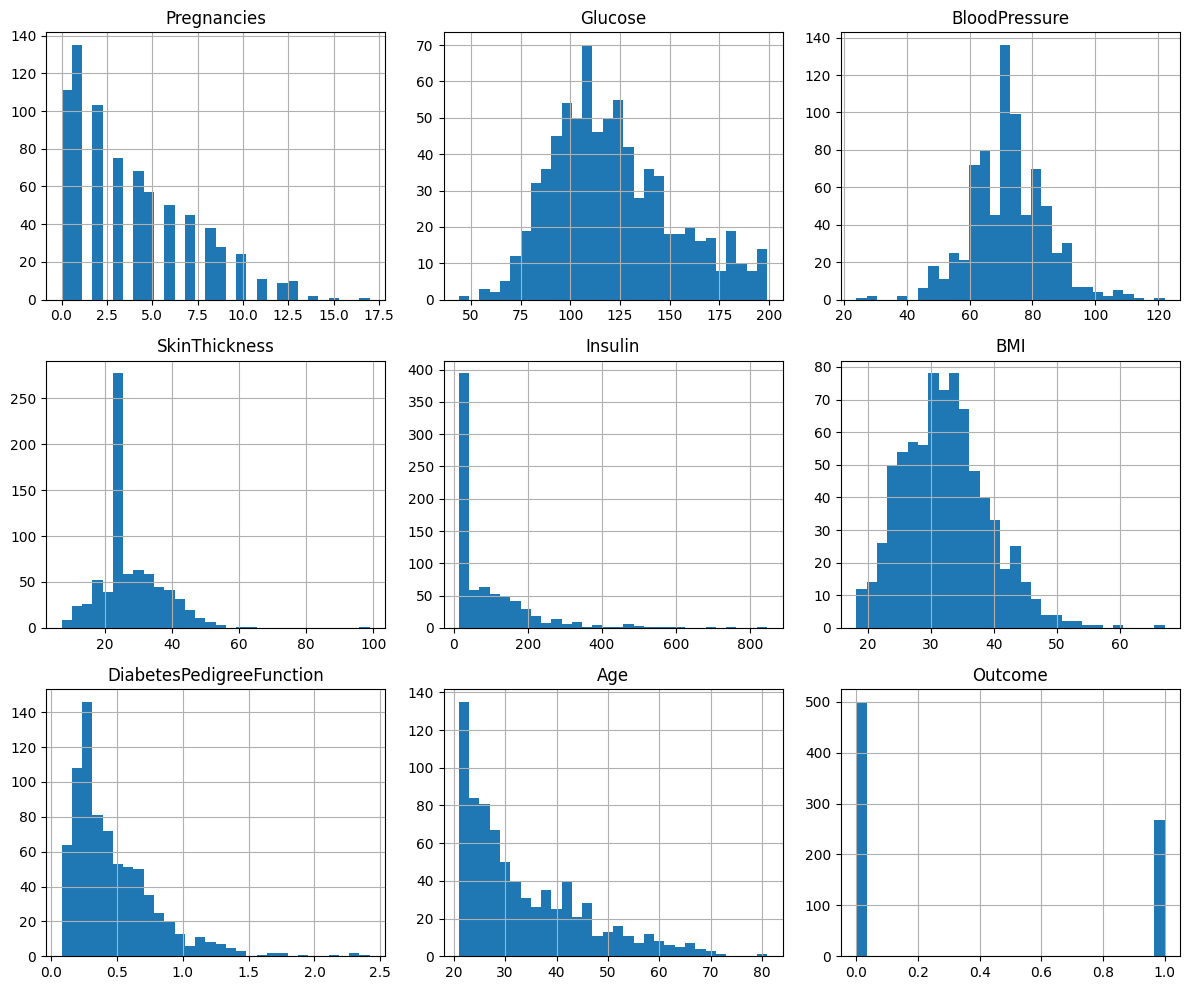

In [62]:
df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

# 5️. Define X and y

In [63]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 6️. Train/test split FIRST (on unscaled data)

In [64]:
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 7️. Feature scaling (fit on train only)

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

# 8. Model selection & hyperparameter tuning

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 31))}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best k:", grid.best_params_)
best_knn = grid.best_estimator_


Best k: {'n_neighbors': 19}


# 9. Evaluation

Accuracy: 0.7467532467532467


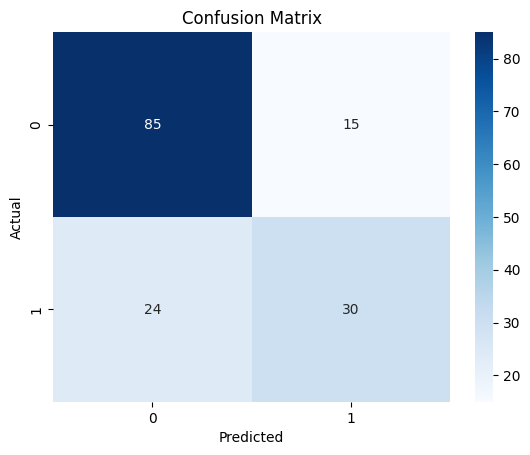

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       100
           1       0.67      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



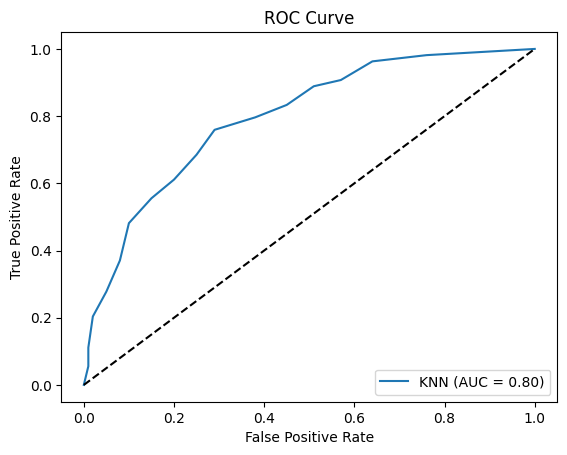

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Predict
y_pred = best_knn.predict(X_test)
y_proba = best_knn.predict_proba(X_test)[:,1]

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# 10. Comparison with other classifiers

In [68]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


models = {
    'KNN': KNeighborsClassifier(n_neighbors=best_knn.n_neighbors),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier()
}

results = {}

for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    scores = cross_val_score(pipeline, X, y, cv=5)
    results[name] = scores.mean()

for name in results:
    print(f"{name}: {results[name]:.4f}")


KNN: 0.7696
LogisticRegression: 0.7644
RandomForest: 0.7683
